# Import

In [28]:
import pandas as pd
import numpy as np

import nltk
import re
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

from env import github_token, github_username
import base_acquire
import wrangle

# Make sure we can see the full scale of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [3]:
df = pd.DataFrame(base_acquire.scrape_github_data())
df.head()

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."


In [4]:
df['clean_text'] = df['readme_contents'].apply(clean).apply(' '.join)
df.head()

,repo,language,readme_contents,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...


In [5]:
# Save Data to .csv
df.to_csv('repo.csv', index=False)

# Basic Exploration

In [6]:
df.language.value_counts()

JavaScript          24
Python              20
HTML                17
C++                 16
Jupyter Notebook    11
Java                 6
C                    5
Ruby                 3
TeX                  2
Shell                2
TypeScript           2
Go                   2
C#                   2
Assembly             1
Mathematica          1
CSS                  1
Swift                1
Kotlin               1
G-code               1
R                    1
PHP                  1
MATLAB               1
Matlab               1
Groff                1
Objective-C          1
Name: language, dtype: int64

In [14]:
df.repo.nunique(), df.shape

(124, (124, 4))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             124 non-null    object
 1   language         124 non-null    object
 2   readme_contents  124 non-null    object
 3   clean_text       124 non-null    object
dtypes: object(4)
memory usage: 4.0+ KB


## Takeaways
- 124 rows (unique repos), 4 columns
- 25 different coding languages
- majority are JavaScript, Python, HTML, and C++
-----------------
# Question
**Does the length of the README vary by programming language?**

In [18]:
# Get the length of text in each README
df['text_length'] = df.clean_text.apply(len)
df.head()

,repo,language,readme_contents,clean_text,text_length
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...,53807
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...,10357
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...,3866
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...,7995
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...,14774


In [22]:
# Quick Metrics
df.text_length.describe()

count      124.000000
mean      5870.153226
std       7181.930247
min         67.000000
25%       2029.750000
50%       3799.000000
75%       7447.250000
max      53807.000000
Name: text_length, dtype: float64

In [19]:
df.clean_text.apply(len).sort_values()

59       67
74       89
66      107
64      139
58      179
      ...  
12    17430
44    20765
99    22345
14    43769
0     53807
Name: clean_text, Length: 124, dtype: int64

<AxesSubplot:>

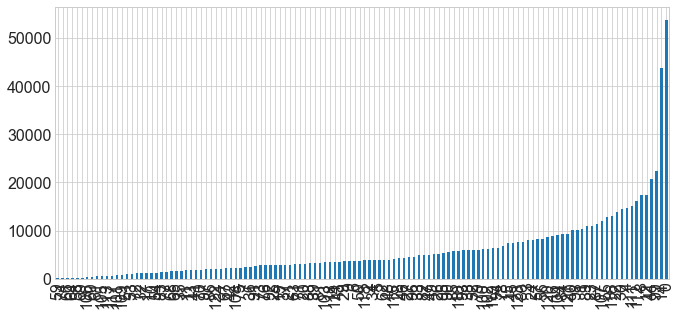

In [29]:
df.text_length.sort_values().plot.bar()

In [ ]:
# there are two repos with 30,000 more text than all the others

In [10]:
# Let's build a Bag of Words
cv = CountVectorizer()
bag_of_words = cv.fit_transform(df.clean_text)

In [11]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [12]:
cv.get_feature_names_out()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names_out'

In [ ]:
cv.vocabulary_